# 問題7.3
> $n$変量VECモデル(7.14)，$n$変量DVECモデル(7.15)，$n$変量BEKKモデル(7.16)，$n$変量CCCモデル(7.17)，(7.18)，$n$変量DCCモデル(7.19)~(7.21)のパラメータの数を$n$の式で表せ．

In [1]:
library(rmgarch)
library(MASS)

Loading required package: rugarch

Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma




## $n$変量VECモデル
(7.14)は以下の通り．
$$
\mathrm{vech}(\mathbf{H}_t) = \mathbf{c} + \mathbf{B} \mathrm{vech}(\mathbf{H}_{t-1}) 
+ \mathbf{A}\mathrm{vech}(\mathbf{u}_{t-1}\mathbf{u}'_{t-1})
$$
ここで，$\mathrm{vech}$は行列の下三角行列をベクトルとして並べる作用素であり，例えば$(i, j)$成分が$h_{ij}$である$3 \times 3$行列$\mathbf{H}$に対しては
$$
\mathrm{vech}(\mathbf{H}) = (h_{11}, h_{21}, h_{31}, h_{22}, h_{23}, h_{33})
$$
となる．
つまり，$\mathbf{c}$は$n(n+1)/2 \times 1$のベクトル，$\mathbf{B}$と$\mathbf{A}$は$n(n+1)/2 \times n(n+1)/2$行列となり，
合計のパラメータ数は
$$
\frac{n(n+1)}{2} + \left( \frac{n(n+1)}{2} \right)^2 + \left( \frac{n(n+1)}{2} \right)^2
= \frac{n(n+1)}{2} + \frac{n^2(n+1)^2}{2}
$$
となる．

適当なパラメータでシミュレーションしてみる

In [2]:
set.seed(20210709)
n <- 3

# パラメータ設定
mu <- runif(n, 0.01, 0.1)
H_0 <- cov(mvrnorm(4, mu=numeric(n), Sigma=diag(1:n)/n/5))
cat("mu: \n")
print(mu)
cat("H_0: \n")
print(H_0)

m <- n*(n+1)/2
c <- runif(m, -0.01, 0.01)
B <- matrix(runif(m^2, 0.5, 0.7), m, m)
A <- matrix(runif(m^2, 0, 0.3), m, m)

cat("c: \n")
print(c)
cat("B: \n")
print(B)
cat("A: \n")
print(A)

mu: 
[1] 0.03290116 0.03008878 0.08236372
H_0: 
             [,1]         [,2]        [,3]
[1,]  0.192505813 -0.003957902  0.26203314
[2,] -0.003957902  0.033524587 -0.04239628
[3,]  0.262033140 -0.042396280  0.50366302
c: 
[1] -0.001423512 -0.001220563 -0.004016685  0.001594857 -0.006169133
[6] -0.004932872
B: 
          [,1]      [,2]      [,3]      [,4]      [,5]      [,6]
[1,] 0.6904562 0.5761429 0.6060995 0.5307908 0.6854565 0.6868056
[2,] 0.5914309 0.5797851 0.6669176 0.6813972 0.6321845 0.5642827
[3,] 0.6857439 0.6380211 0.6614066 0.6589086 0.5210424 0.6696570
[4,] 0.6025173 0.5886534 0.6638044 0.5735575 0.5284444 0.6432524
[5,] 0.6821191 0.5743670 0.6583619 0.6525918 0.5636238 0.5725132
[6,] 0.6502616 0.6031700 0.5534803 0.5863352 0.6527885 0.5750896
A: 
           [,1]       [,2]       [,3]       [,4]        [,5]       [,6]
[1,] 0.13131263 0.25397666 0.09245131 0.08853796 0.250286699 0.02886510
[2,] 0.01591197 0.27765028 0.28652242 0.10860209 0.054457932 0.21214544
[3,] 0.0837

In [3]:
vech <- function(x){
    result <- c()
    for(j in 1:dim(x)[2]){
        for(i in 1:dim(x)[1]){
            if(i >= j){
                result <- c(result, x[i, j])
            }
        }
    }
    return(result)
}
vech(H_0)

[1]  0.192505813 -0.003957902  0.262033140  0.033524587 -0.042396280
[6]  0.503663022

すぐに$H$が半正定でなくなってしまう．

In [4]:
# 乱数シミュレーション
N <- 100
y <- matrix(0, N, n)
H <- H_0
for(i in 1:N){
    u <- mvrnorm(1, mu=numeric(n), Sigma=H)
    y[i, ] <- mu + u
    u_mat <- matrix(u, n, 1)
    H_vec <- matrix(c, m, 1) + B %*% matrix(vech(H), m, 1) + A %*% matrix(vech(u_mat %*% t(u_mat)), m, 1)
    k <- 1
    for(i in 1:n){
        for(j in i:n){
            H[i, j] = H_vec[k]
            H[j, i] = H_vec[k]
            k <- k+1
        }
    }
}

ERROR: Error in mvrnorm(1, mu = numeric(n), Sigma = H): 'Sigma' is not positive definite


In [5]:
print(i)
print(H_vec)
print(H)
print(eigen(H))

[1] 2
          [,1]
[1,] 0.6127555
[2,] 0.5813193
[3,] 0.6382737
[4,] 0.6233161
[5,] 0.5905431
[6,] 0.5702951
          [,1]      [,2]      [,3]
[1,] 0.6127555 0.5813193 0.6382737
[2,] 0.5813193 0.6233161 0.5905431
[3,] 0.6382737 0.5905431 0.5702951
eigen() decomposition
$values
[1]  1.80903342  0.04743323 -0.05010005

$vectors
          [,1]       [,2]       [,3]
[1,] 0.5848039  0.5265362 -0.6170608
[2,] 0.5727837 -0.8066892 -0.1455043
[3,] 0.5743895  0.2683509  0.7733463



「最初に紹介するモデルは，Bollerslev, et al. (1988)による**VECモデル**であり…」と本にあるが，Bollerslev et al. (1988)では，VECモデルを単に最も一般的な形として記載しただけで，実際にはDVECモデルを使用している．

## $n$変量DVECモデル
(7.15)は以下の通り．
$$
\mathbf{H}_t = \mathbf{C} + \mathbf{B} \odot \mathbf{H}_{t-1} 
+ \mathbf{A} \odot \left( \mathbf{u}_{t-1}\mathbf{u}'_{t-1} \right)
$$
ここで，$\odot$は行列の成分ごとの積を表すアダマール積である．
$\mathbf{A}, \mathbf{B}, \mathbf{C}$は対称行列を仮定しているので，
合計パラメータ数は
$$
3 \frac{n(n+1)}{2}
$$
となる．

In [27]:
set.seed(20210709)
n <- 3

# パラメータ設定
mu <- runif(n, 0.01, 0.1)
H_0 <- cov(mvrnorm(4, mu=numeric(n), Sigma=diag(1:n)/n/5))
cat("mu: \n")
print(mu)
cat("H_0: \n")
print(H_0)

C <- H_0
B <- cov(mvrnorm(4, mu=numeric(n), Sigma=diag(1:n)/n/5))
A <- cov(mvrnorm(4, mu=numeric(n), Sigma=diag(1:n)/n/5))

cat("C: \n")
print(C)
cat("B: \n")
print(B)
cat("A: \n")
print(A)

mu: 
[1] 0.03290116 0.03008878 0.08236372
H_0: 
             [,1]         [,2]        [,3]
[1,]  0.192505813 -0.003957902  0.26203314
[2,] -0.003957902  0.033524587 -0.04239628
[3,]  0.262033140 -0.042396280  0.50366302
C: 
             [,1]         [,2]        [,3]
[1,]  0.192505813 -0.003957902  0.26203314
[2,] -0.003957902  0.033524587 -0.04239628
[3,]  0.262033140 -0.042396280  0.50366302
B: 
            [,1]         [,2]        [,3]
[1,]  0.02254027 -0.041160640 0.022532974
[2,] -0.04116064  0.090710205 0.002939805
[3,]  0.02253297  0.002939805 0.256576686
A: 
             [,1]        [,2]         [,3]
[1,]  0.002322772 -0.01740084 -0.004814466
[2,] -0.017400837  0.22029449  0.166825766
[3,] -0.004814466  0.16682577  0.224879701


In [28]:
# 乱数シミュレーション
N <- 100
y <- matrix(0, N, n)
H <- H_0
for(i in 1:N){
    u <- mvrnorm(1, mu=numeric(n), Sigma=H)
    y[i, ] <- mu + u
    u_mat <- matrix(u, n, 1)
    H <- C + B * H + A * (u_mat %*% t(u_mat))
}

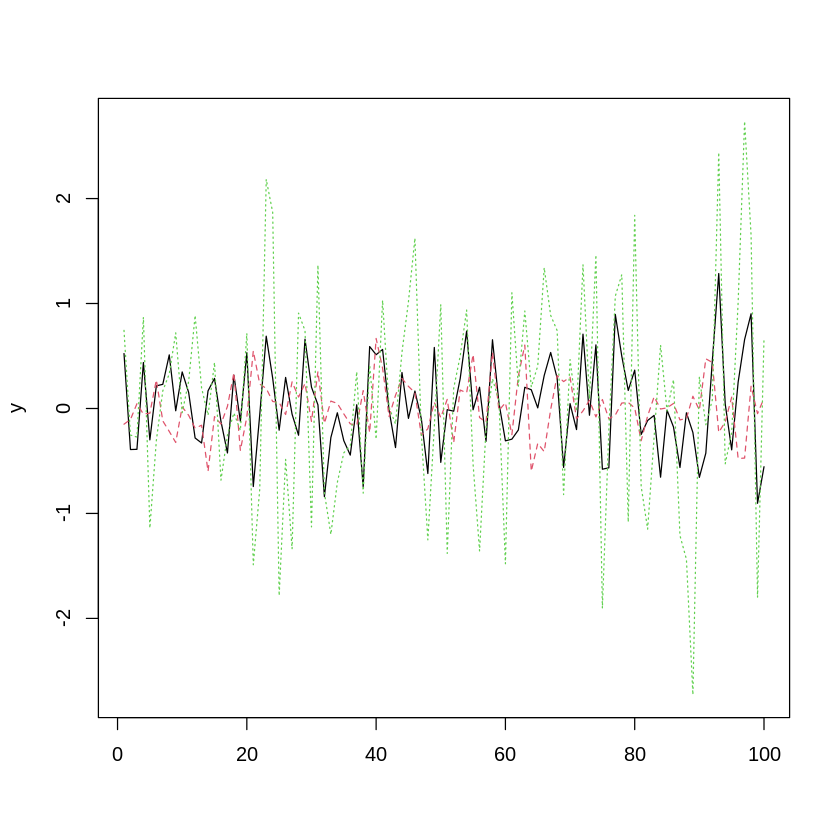

In [35]:
matplot(y, type="l")

DVECモデルを推定するパッケージがあればそれでパラメータ数を確認したかったが，見当たらなかった．$\mathbf{H}_t$の半正定性を保証しつつパラメータ推定ってどうすんの？

## $n$変量BEKKモデル
(7.16)は以下の通り．
$$
\mathbf{H}_t = \mathbf{C} + \mathbf{B} \mathbf{H}_{t-1}) \mathbf{B}'
+ \mathbf{A} \mathbf{u}_{t-1}\mathbf{u}'_{t-1} \mathbf{A}'
$$
$\mathbf{C}$は対称行列を仮定しているので，合計パラメータ数は
$$
2n^2 + \frac{n(n+1)}{2}
$$
となる．

BEKKを推定するやつはあるっぽいけど面倒なのでスキップ

# $n$変量CCCモデル
(7.17)，(7.18)は以下の通り．
$$
\mathbf{D}_t = \mathrm{diag}(h_{11, t}, ..., h_{nn, t})^\frac{1}{2}
$$
$$
\mathbf{H}_t = \mathbf{D}_t \mathbf{R} \mathbf{D}_t
$$
ここで，$\mathbf{H}_t$の対角成分$h_{11}, ..., h_{nn}$はそれぞれ1変量GARCHモデルによってモデル化されているとし，$\mathbf{R}$は時不変な相関係数である．
$\mathbf{H}_t$の対角成分がそれぞれGARCH(1, 1)でモデル化されていると，対角成分を表現するために必要なパラメータの数は$3n$となる．
相関係数のパラメータ数と合わせると，合計パラメータ数は
$$
3n + \frac{n(n-1)}{2}
$$
となる．

# $n$変量DCCモデル
(7.19)~(7.21)は以下の通り．
$$
\mathbf{H}_t = \mathbf{D}_t \mathbf{R}_t \mathbf{D}_t
$$
$$
\mathbf{R}_t = \mathrm{diag}(q_{11, t}, ..., q_{nn, t})^{-\frac{1}{2}} \mathbf{Q}_t \mathrm{diag}(q_{11, t}, ..., q_{nn, t})^{-\frac{1}{2}}
$$
$$
\mathbf{Q}_t = (1-a-b) \bar{\mathbf{Q}} + b\mathbf{Q}_{t-1} + a \varepsilon_{t-1} \varepsilon'_{t-1}
$$
ここで，$\mathbf{H}_t$の対角成分$h_{11}, ..., h_{nn}$はそれぞれ1変量GARCHモデルによってモデル化されているとし，$\mathbf{R}$は時不変な相関係数である．
$\mathbf{H}_t$の対角成分がそれぞれGARCH(1, 1)でモデル化されていると，対角成分を表現するために必要なパラメータの数は$3n$となる．
相関係数のパラメータ数と合わせると，合計パラメータ数は
$$
3n + \frac{n(n-1)}{2}
$$
となる．

「問題4.5でダウンロードしたデータ」を読み込む

In [4]:
library(tidyverse)
msci_day <- read_csv("msci_day.csv")
msci_day


── Column specification ────────────────────────────────────────────────────────
cols(
  Date = col_date(format = ""),
  ca = col_double(),
  fr = col_double(),
  ge = col_double(),
  it = col_double(),
  jp = col_double(),
  uk = col_double(),
  us = col_double()
)




Date,ca,fr,ge,it,jp,uk,us
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2003-01-01,560.099,902.081,724.932,290.187,1593.175,791.076,824.583
2003-01-02,574.701,927.206,768.150,296.963,1578.214,797.813,852.219
2003-01-03,580.212,929.297,768.411,298.757,1578.411,800.175,851.935
2003-01-06,589.619,943.002,788.164,303.273,1619.700,803.966,871.515
2003-01-07,585.822,923.785,774.054,297.892,1590.951,793.625,865.992
2003-01-08,576.522,900.435,742.414,293.791,1564.566,783.566,853.401
2003-01-09,584.049,923.589,759.251,299.526,1569.706,789.255,869.893
2003-01-10,590.395,927.235,763.505,299.719,1565.966,798.244,870.275
2003-01-13,593.748,928.450,770.370,301.314,1573.799,792.042,869.034


> (1) MSCIデータの標本数と同数の正規ホワイトノイズ$wn_t$を
> $$ wn_t = \varepsilon_t, \quad \varepsilon_t \sim \mathrm{iid} N(0, 1) $$
> という式に従って，コンピュータを用いて作成せよ．

まずはデータの標本数を確認

In [8]:
n_data <- nrow(msci_day)
n_data

[1] 1391

ホワイトノイズを発生

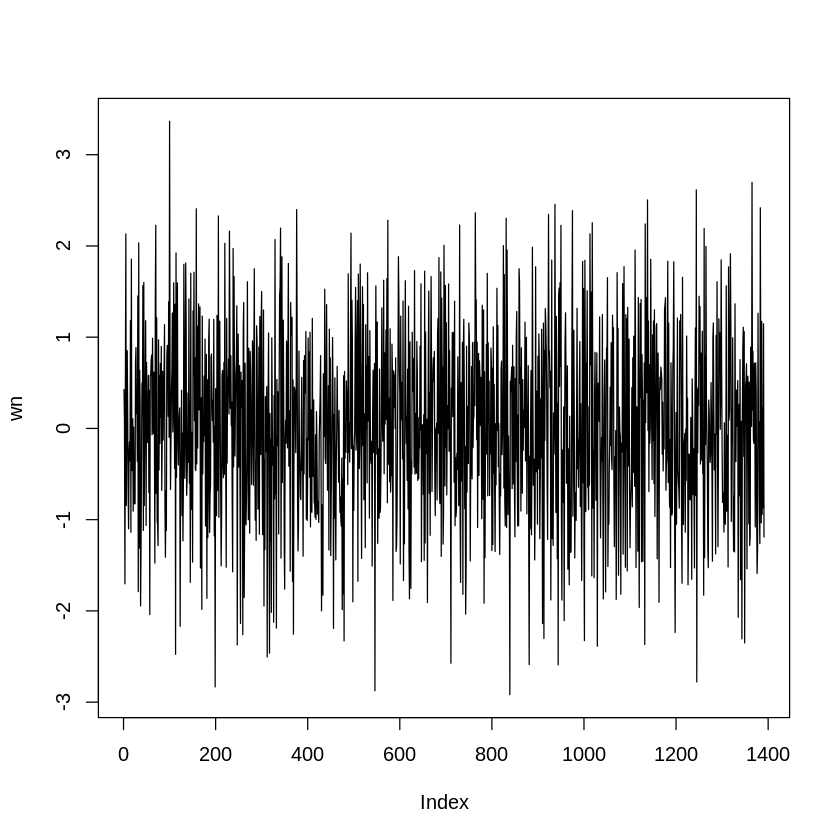

In [27]:
set.seed(20210528)
wn <- rnorm(n_data)
plot(wn, type="l")

> (2) G7国のMSCIデータの対数を取ったものを$p_t$とし，
> $$ p_t = \alpha + \beta wn_t + \varepsilon_t $$
> という回帰モデルを推定し，表6.1と同様の表を作成せよ．
> また，見せかけの会期の現象が見られるかどうか答えよ

対数データを作成して回帰する

In [29]:
p_data <- log(msci_day[, -1])
lm_result <- lapply(p_data, function(x) lm(x~wn))
lapply(lm_result, summary)

$ca

Call:
lm(formula = x ~ wn)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71221 -0.29085  0.03582  0.27395  0.63868 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.042565   0.009517 739.972   <2e-16 ***
wn          -0.005280   0.009504  -0.556    0.579    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3549 on 1389 degrees of freedom
Multiple R-squared:  0.0002221,	Adjusted R-squared:  -0.0004976 
F-statistic: 0.3086 on 1 and 1389 DF,  p-value: 0.5786


$fr

Call:
lm(formula = x ~ wn)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71721 -0.19781 -0.00694  0.26770  0.44830 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.323582   0.007720 948.640   <2e-16 ***
wn          -0.004361   0.007709  -0.566    0.572    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2879 on 1389 degrees of freedo

表6.1っぽくする

In [30]:
table_6_1 <- tibble(
    country = names(lm_result), 
    beta = sapply(lm_result, function(x) coef(x)["wn"]), 
    p = sapply(lm_result, function(x) summary(x)$coefficients["wn", "Pr(>|t|)"]), 
    r2 = sapply(lm_result, function(x) summary(x)$adj.r.squared)
)
table_6_1

country,beta,p,r2
<chr>,<dbl>,<dbl>,<dbl>
ca,-0.005280016,0.5786137,-0.0004976385
fr,-0.004361057,0.5717060,-0.0004894564
ge,-0.005761287,0.5394673,-0.0004486079
it,-0.002609097,0.6955566,-0.0006095805
jp,-0.005003483,0.4262475,-0.0002638117
uk,-0.003522519,0.5683039,-0.0004853549
us,-0.001615093,0.6910101,-0.0006060794


いずれも回帰係数のp値は有意な水準ではなく，見せかけの回帰が起こっているとは言えない

> (3) MSCIデータの標本数と同数のランダムウォーク$rw_t$を
> $$ rw_t = rw_{t-1} + \varepsilon_t, \quad \varepsilon_t \sim \mathrm{iid} N(0, 1) $$
> という式に従って，コンピュータを用いて作成せよ．ただし，$rw_0 = 0$とする．

ホワイトノイズを利用して作成する

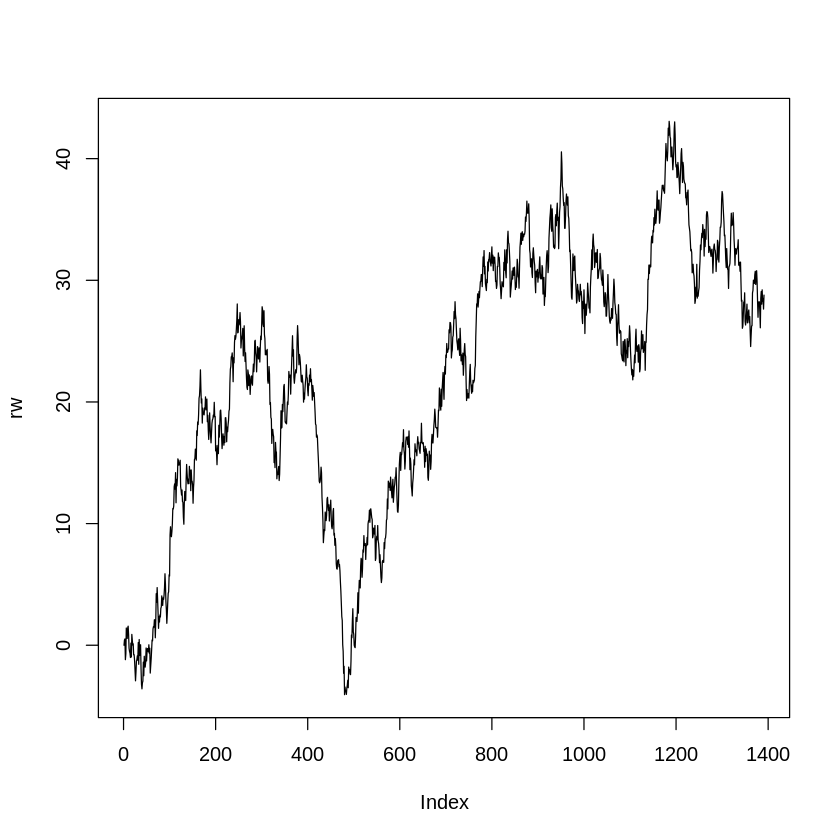

In [32]:
rw <- cumsum(c(0, wn[-n_data]))
plot(rw, type="l")

> (4) $p_t$を定数と$rw_t$に回帰したモデル
> $$ p_t = \alpha + \beta rw_t + \varepsilon_t $$
> を推定し，表6.1と同様のひょうを作成せよ．また，見せかけの回帰の現象が見られるかどうか答えよ．

(2)のプログラムを利用する

In [35]:
lm_result2 <- lapply(p_data, function(x) lm(x~rw))
lapply(lm_result2, summary)

$ca

Call:
lm(formula = x ~ rw)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50784 -0.13760  0.00232  0.15760  0.53086 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.4746375  0.0131150   493.7   <2e-16 ***
rw          0.0258378  0.0005349    48.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2168 on 1389 degrees of freedom
Multiple R-squared:  0.6268,	Adjusted R-squared:  0.6265 
F-statistic:  2333 on 1 and 1389 DF,  p-value: < 2.2e-16


$fr

Call:
lm(formula = x ~ rw)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42427 -0.13665 -0.01077  0.14846  0.43052 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.8715612  0.0109662  626.61   <2e-16 ***
rw          0.0205645  0.0004473   45.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1813 on 1389 degrees of freedom
Mul

In [37]:
table_6_1_2 <- tibble(
    country = names(lm_result2), 
    beta = sapply(lm_result2, function(x) coef(x)["rw"]), 
    p = sapply(lm_result2, function(x) summary(x)$coefficients["rw", "Pr(>|t|)"]), 
    r2 = sapply(lm_result2, function(x) summary(x)$adj.r.squared)
)
table_6_1_2

country,beta,p,r2
<chr>,<dbl>,<dbl>,<dbl>
ca,0.02583778,1.378413e-299,0.6265386
fr,0.02056446,2.860733e-281,0.6031664
ge,0.02524039,8.760987e-289,0.6129258
it,0.01669264,3.256517e-231,0.5315704
jp,0.01730323,2.163948e-312,0.6420545
uk,0.01620549,2.891607e-267,0.5843157
us,0.01086020,2.313913e-283,0.6059082


MSCIデータとは全く無関係に生成したデータだが，どの国の結果でもp値はほぼ0となっている．つまり，見せかけの回帰の現象が見られる．

> (5) $p_t$を定数と$rw_t, rw_{t-1}, p_{t-1}$に回帰したモデル
> $$ p_t = \alpha + \beta_1 rw_t + \beta_2 rw_{t-1} + \beta_3 p_{t-1} + \varepsilon_t $$
> を推定し，$\beta_1$に関して表6.1と同様の表を作成せよ．また，見せかけの回帰の現象が見られるかどうか答えよ．

(4)と同様の方針で行う

In [41]:
rw_0 <- rw[-1]
rw_1 <- rw[-n_data]
lm_5 <- function(x){
    p_0 <- x[-1]
    p_1 <- x[-n_data]
    return(lm(p_0 ~ rw_0 + rw_1 + p_1))
}
lm_result3 <- lapply(p_data, lm_5)
lapply(lm_result3, summary)

$ca

Call:
lm(formula = p_0 ~ rw_0 + rw_1 + p_1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.053307 -0.005694  0.000646  0.006378  0.048512 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.463e-03  8.370e-03   0.892    0.373    
rw_0         3.166e-05  2.794e-04   0.113    0.910    
rw_1        -4.212e-05  2.792e-04  -0.151    0.880    
p_1          9.991e-01  1.289e-03 774.895   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01039 on 1386 degrees of freedom
Multiple R-squared:  0.9991,	Adjusted R-squared:  0.9991 
F-statistic: 5.379e+05 on 3 and 1386 DF,  p-value: < 2.2e-16


$fr

Call:
lm(formula = p_0 ~ rw_0 + rw_1 + p_1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.078824 -0.005982  0.000280  0.006743  0.067694 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0157277  0.0117538   1.338    0.181    
rw_0      

In [42]:
table_6_1_3 <- tibble(
    country = names(lm_result3), 
    beta = sapply(lm_result3, function(x) coef(x)["rw_0"]), 
    p = sapply(lm_result3, function(x) summary(x)$coefficients["rw_0", "Pr(>|t|)"]), 
    r2 = sapply(lm_result3, function(x) summary(x)$adj.r.squared)
)
table_6_1_3

country,beta,p,r2
<chr>,<dbl>,<dbl>,<dbl>
ca,3.165928e-05,0.909817311,0.9991399
fr,-1.538192e-04,0.619397384,0.9983958
ge,-2.068049e-04,0.538236536,0.9987259
it,-1.898860e-04,0.481002712,0.9983741
jp,-3.075850e-04,0.373619225,0.9969919
uk,2.109699e-05,0.939957365,0.9979523
us,-6.356126e-04,0.006370384,0.9967372


推定された$\beta_0$はほぼ0で，かつp値は有意な水準ではない．よって見せかけの回帰の現象は見られない．

$p_{t-1}$がない場合は，弱い見せかけの回帰が見られる．

In [47]:
lm_5x <- function(x){
    p_0 <- x[-1]
    return(lm(p_0 ~ rw_0 + rw_1))
}
lm_result4 <- lapply(p_data, lm_5x)
lapply(lm_result4, summary)

$ca

Call:
lm(formula = p_0 ~ rw_0 + rw_1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48998 -0.13294  0.00034  0.15811  0.52743 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.474581   0.013123 493.394   <2e-16 ***
rw_0        0.012182   0.005812   2.096   0.0363 *  
rw_1        0.013676   0.005804   2.356   0.0186 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2165 on 1387 degrees of freedom
Multiple R-squared:  0.6273,	Adjusted R-squared:  0.6268 
F-statistic:  1167 on 2 and 1387 DF,  p-value: < 2.2e-16


$fr

Call:
lm(formula = p_0 ~ rw_0 + rw_1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41145 -0.13492 -0.01156  0.14692  0.42618 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.871316   0.010974 626.123   <2e-16 ***
rw_0        0.009307   0.004861   1.915   0.0557 .  
rw_1        0.011282   0.004854   2.324   0.0203 *  
---
Sign

$rw_{t-1}$がない場合は見せかけの回帰は見られない．

In [46]:
lm_5y <- function(x){
    p_0 <- x[-1]
    p_1 <- x[-n_data]
    return(lm(p_0 ~ rw_0 + p_1))
}
lm_result5 <- lapply(p_data, lm_5y)
lapply(lm_result5, summary)

$ca

Call:
lm(formula = p_0 ~ rw_0 + p_1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.053228 -0.005686  0.000652  0.006363  0.048558 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.541e-03  8.351e-03   0.903    0.367    
rw_0        -1.002e-05  4.201e-05  -0.239    0.811    
p_1          9.991e-01  1.286e-03 776.722   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01039 on 1387 degrees of freedom
Multiple R-squared:  0.9991,	Adjusted R-squared:  0.9991 
F-statistic: 8.074e+05 on 2 and 1387 DF,  p-value: < 2.2e-16


$fr

Call:
lm(formula = p_0 ~ rw_0 + p_1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.079157 -0.005902  0.000283  0.006739  0.067669 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.532e-02  1.173e-02   1.306    0.192    
rw_0        2.230e-05  4.516e-05   0.494    0.621    
p_1         9.979e-01  1.70